<center>
<h1>
Présentation finale:
</h1>
</center>

In [25]:
import sys, os
sys.path.append("../")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from utils import normalize
import utils
from kmeans import KMeans
from sklearn.decomposition import PCA
from pso import ParticleSwarmOptimizedClustering
from particle import quantization_error, calc_sse
import seaborn
from sklearn.metrics import silhouette_score
seaborn.set_palette('husl')

<center>
<h1>
Heart:
</h1>
</center>

## Lecture des datasets

In [26]:
data = pd.read_csv('../data/heart_processed.txt', sep=' ', header=None)
Y_iris = np.array(data[13])
X_iris = data.drop([13], axis=1)
X_iris = X_iris.values
X_iris = normalize(X_iris)
data[13].value_counts()

0    164
1    139
Name: 13, dtype: int64

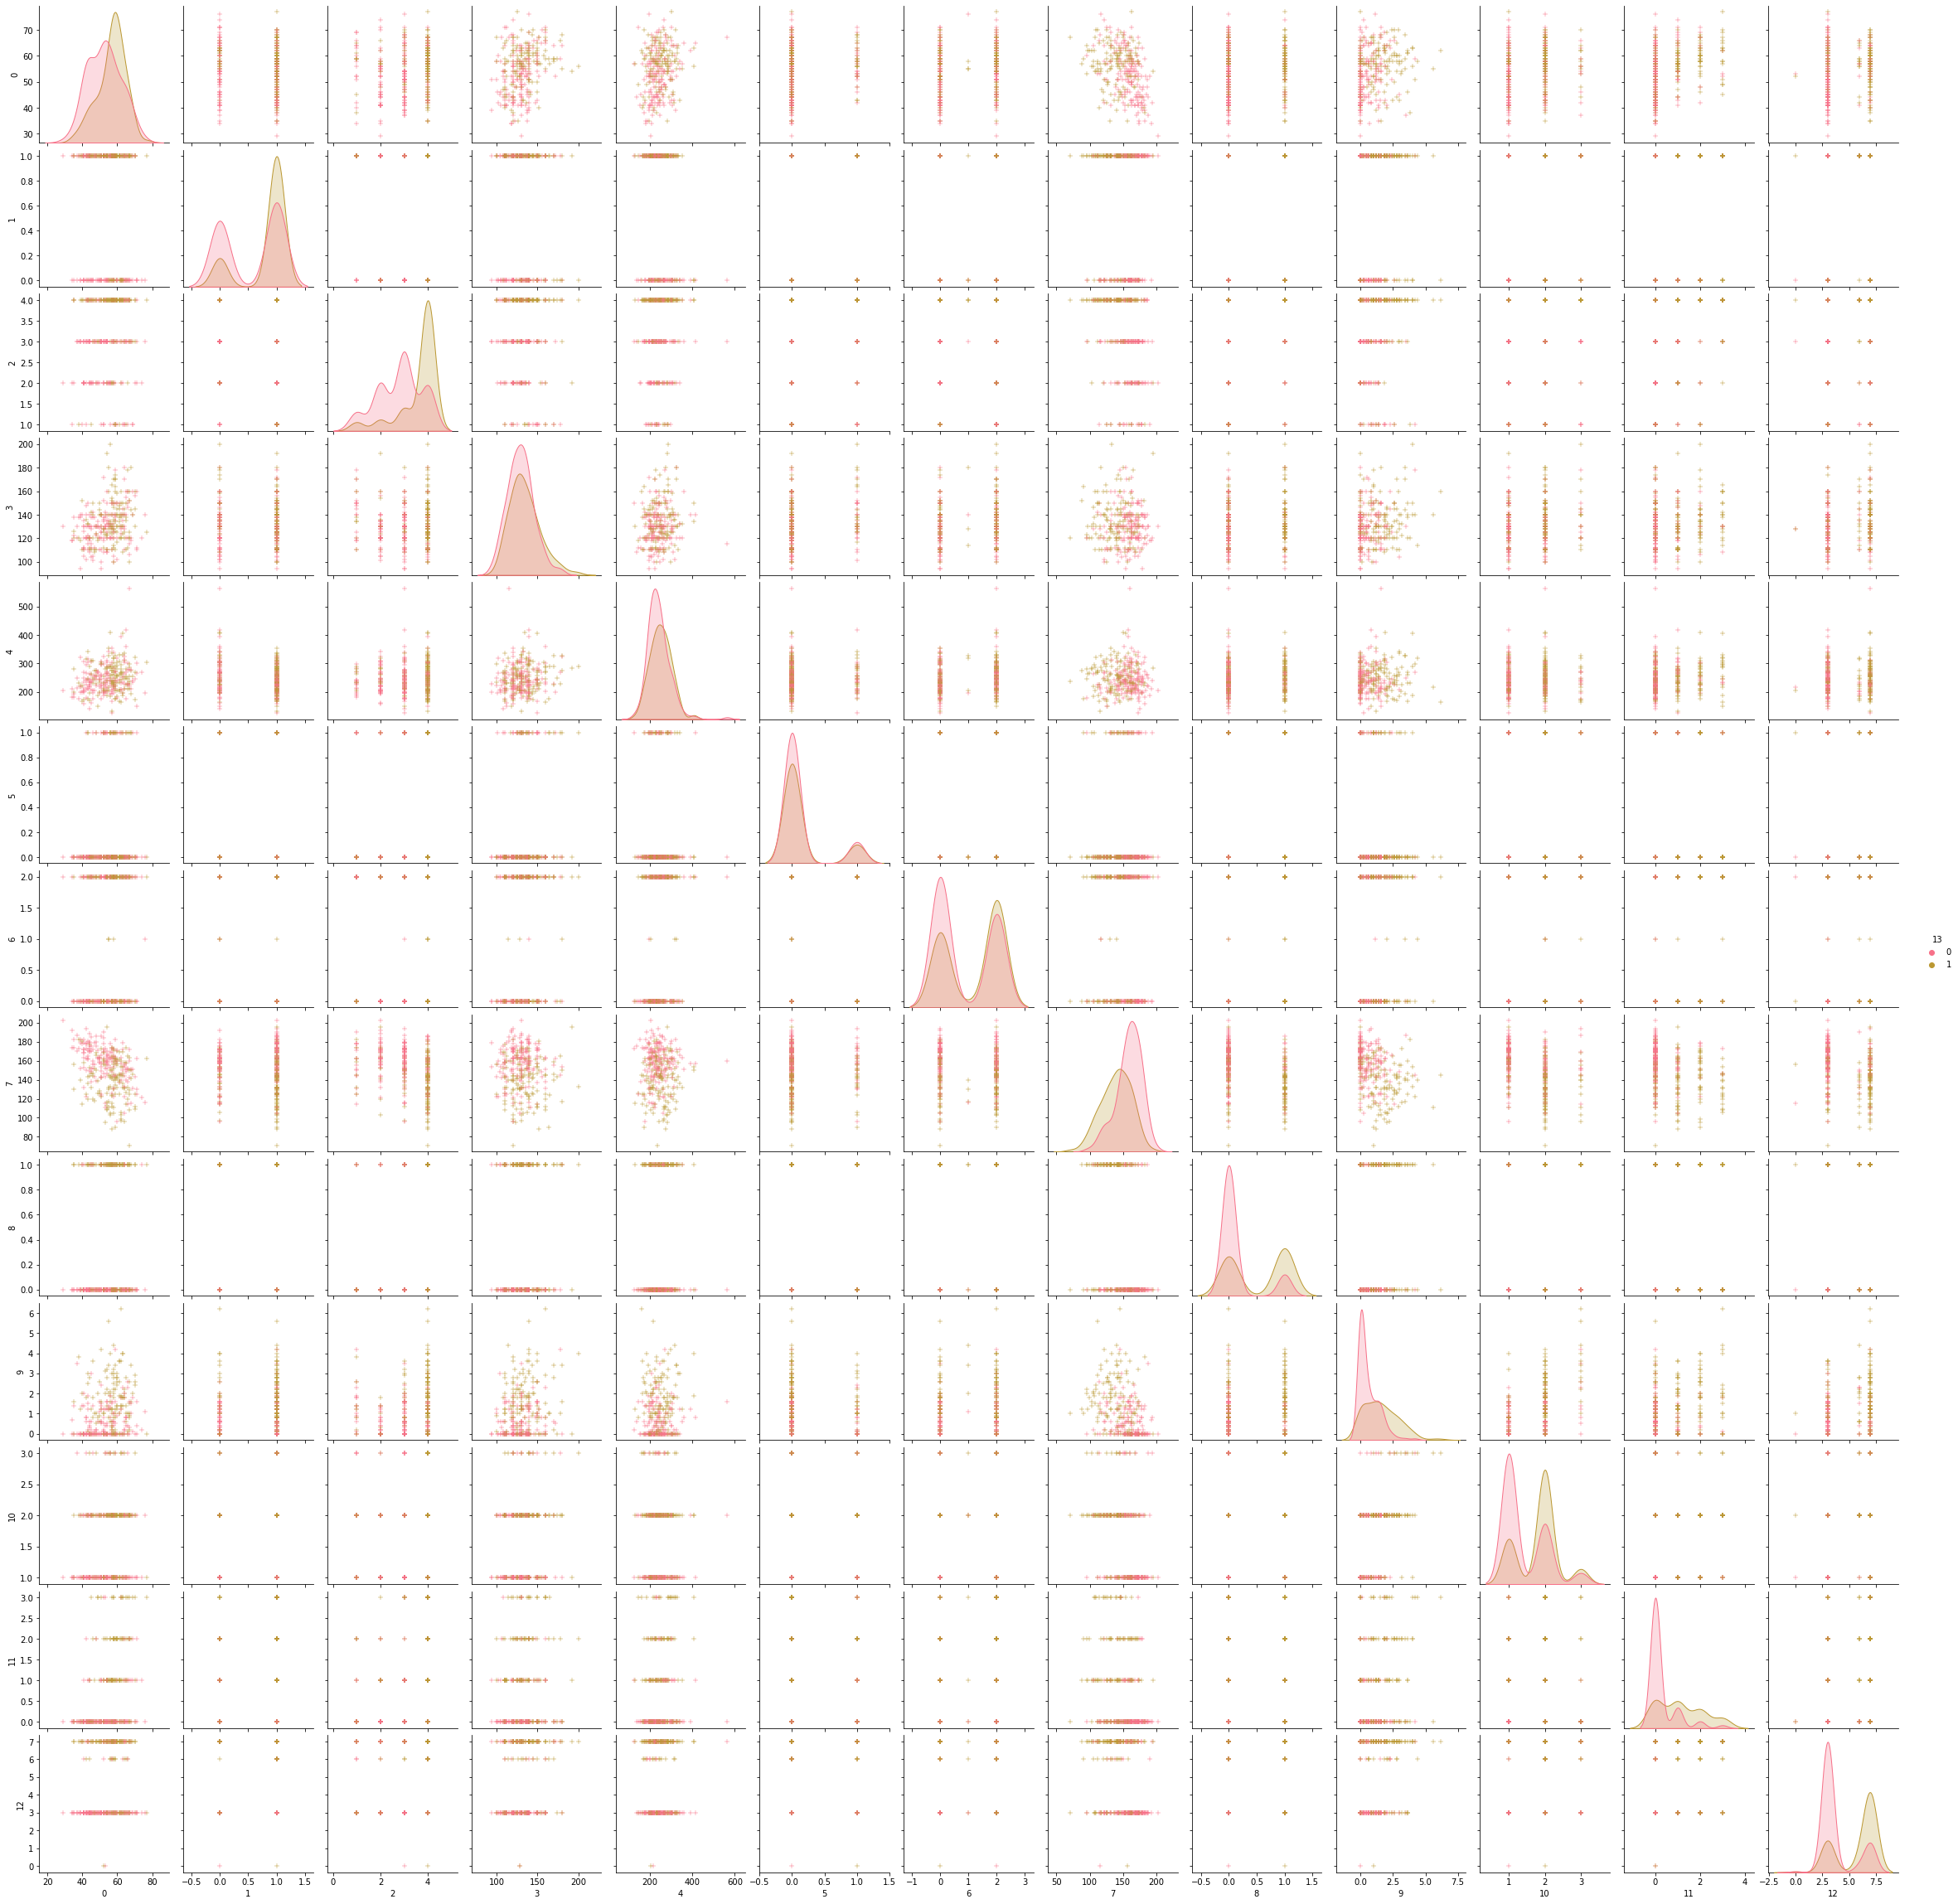

In [27]:
g = seaborn.pairplot(data, hue=13, markers='+')
plt.show()

## ACP

In [28]:
pca = PCA(X_iris.shape[1])
X_iris_r = pca.fit(X_iris).transform(X_iris)

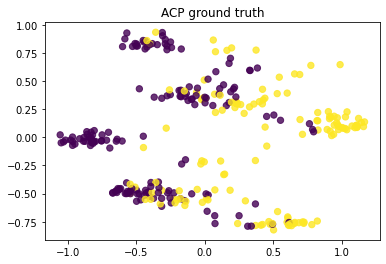

In [65]:
plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c = Y_iris, alpha=.8, s = 40, cmap='viridis')
plt.title("ACP ground truth")
plt.show()

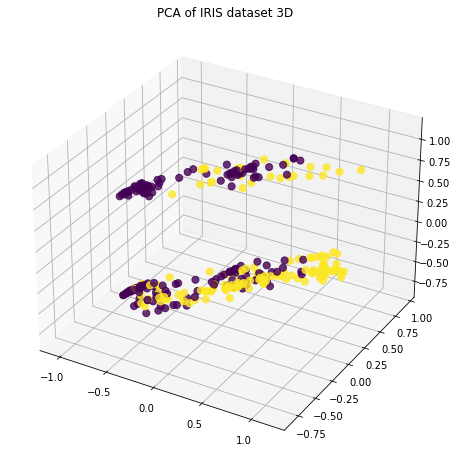

In [30]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
colors = []
sctt = ax.scatter3D(X_iris_r[:,0],X_iris_r[:,1],X_iris_r[:,2],c = Y_iris, s = 50, alpha = 0.8)
plt.title("PCA of IRIS dataset 3D")
plt.show()

## K-means:

Silhouette: 0.1493071878000349
SSE: 343.7566715135276
Quantization: 1.0443919297332505
Err_ratio: (0.6402640264026402, (1, 0))


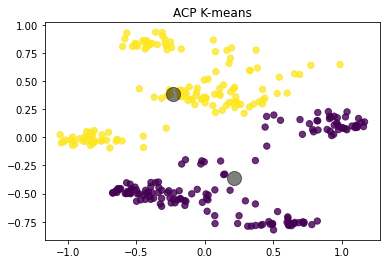

In [62]:
kmeans = KMeans(n_cluster=2, init_pp=False, seed=2018)
kmeans.fit(X_iris)
predicted_kmeans = kmeans.predict(X_iris)
print('Silhouette:', silhouette_score(X_iris, predicted_kmeans))
print('SSE:', kmeans.SSE)
print('Quantization:', quantization_error(centroids=kmeans.centroid, data=X_iris, labels=predicted_kmeans))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_kmeans, Y_iris, 2))

plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c = predicted_kmeans, alpha=.8, s = 40, cmap='viridis')
centers = pca.transform(kmeans.centroid) 
plt.title("ACP K-means")
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=0.5);

## K-means++:

Silhouette: 0.21415960170661166
SSE: 321.11027471724026
Quantization: 1.0008511461371405
Err_ratio: (0.7161716171617162, (1, 0))


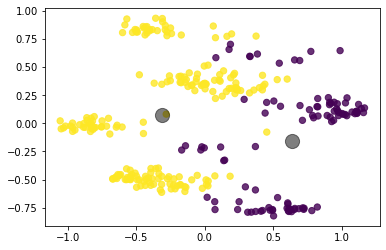

In [63]:
kmeans = KMeans(n_cluster=2, init_pp=True, seed=2017)
kmeans.fit(X_iris)
predicted_kmeans = kmeans.predict(X_iris)
print('Silhouette:', silhouette_score(X_iris, predicted_kmeans))
print('SSE:', kmeans.SSE)
print('Quantization:', quantization_error(centroids=kmeans.centroid, data=X_iris, labels=predicted_kmeans))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_kmeans, Y_iris, 2))

plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c = predicted_kmeans, alpha=.8, s = 40, cmap='viridis')
centers = pca.transform(kmeans.centroid) 
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=0.5);

## PSO

Initial global best score 501.480557075107
Iteration 0001/4000 current gbest score 405.453600861970471669
Iteration 2001/4000 current gbest score 342.083400587904975509
Finish with gbest score 342.083400587903383894
Silhouette: 0.17197439465358516
SSE: 342.0834005879034
Quantization: 1.0477088732641433
Err_ratio: (0.8250825082508251, (1, 0))


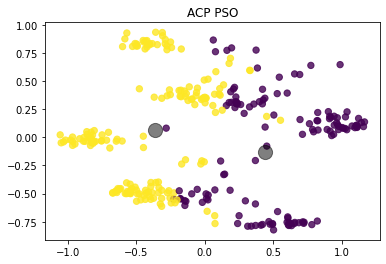

In [70]:
pso = ParticleSwarmOptimizedClustering(
        n_cluster=2, n_particles=20, data=X_iris,dump_w=0.99,c1=2,c2=1,w=1, hybrid=False, max_iter=4000, print_debug=2000, seed = 1995+12)

#n_cluster=2, n_particles=20,dump_w=0.99,w=1,c2=2,c1=1, data=X_iris, hybrid = False, max_iter=4000, print_debug=4000, seed = 2007)
#2018, 1999
hist = pso.run()

pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
pso_kmeans.centroid = pso.gbest_centroids.copy()
predicted_pso = pso_kmeans.predict(X_iris)
print('Silhouette:', silhouette_score(X_iris, predicted_pso))
print('SSE:', calc_sse(centroids=pso.gbest_centroids, data=X_iris, labels=predicted_pso))
print('Quantization:', quantization_error(pso.gbest_centroids, predicted_pso, X_iris))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_pso, Y_iris, 2))
plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c = predicted_pso, alpha=.8, s = 40, cmap='viridis')
centers = pca.transform(pso_kmeans.centroid)
plt.title("ACP PSO")
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=0.5);

## PSO-Hybrid

Initial global best score 501.480557075107
Iteration 0001/4000 current gbest score 405.453600861970471669
Iteration 2001/4000 current gbest score 342.083400587904975509
Finish with gbest score 342.083400587903383894
Silhouette: 0.17197439465358516
SSE: 342.0834005879034
Quantization: 1.0477088732641433
Err_ratio: (0.8250825082508251, (1, 0))


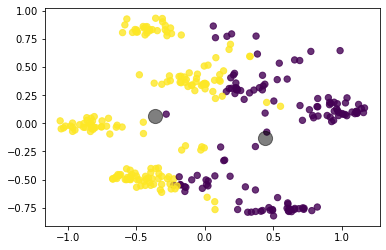

In [69]:
pso = ParticleSwarmOptimizedClustering(
        n_cluster=2, n_particles=20,dump_w=0.99,w=1,c2=2,c1=1, data=X_iris, hybrid = True, max_iter=4000, print_debug=4000, seed = 2021)

hist = pso.run()

pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
pso_kmeans.centroid = pso.gbest_centroids.copy()
predicted_pso = pso_kmeans.predict(X_iris)
print('Silhouette:', silhouette_score(X_iris, predicted_pso))
print('SSE:', calc_sse(centroids=pso.gbest_centroids, data=X_iris, labels=predicted_pso))
print('Quantization:', quantization_error(pso.gbest_centroids, predicted_pso, X_iris))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_pso, Y_iris, 2))
plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c = predicted_pso, alpha=.8, s = 40, cmap='viridis')
centers = pca.transform(pso_kmeans.centroid) 
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=0.5);

<center>
<h1>
Tests:
</h1>
</center>

### K-Means++

In [35]:
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
    'accuracy': [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=2, init_pp=True, seed = 200+_)
    kmean_rep.fit(X_iris)
    predicted_kmean_rep = kmean_rep.predict(X_iris)
    silhouette = silhouette_score(X_iris, predicted_kmean_rep)
    sse = kmean_rep.SSE
    quantization = quantization_error(centroids=kmean_rep.centroid, data=X_iris, labels=predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['quantization'].append(quantization)
    kmeanspp['accuracy'].append(utils.stupid_precision_ratio(predicted_kmean_rep, Y_iris, 2)[0])

### PSO 

In [45]:
%%time
pso_plain = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
    'accuracy': [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=2, n_particles=20, data=X_iris,dump_w=0.99,c1=2,c2=1,w=1, hybrid=False, max_iter=4000, print_debug=2000, seed = 1995+_)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=2, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(X_iris)
    
    silhouette = silhouette_score(X_iris, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=X_iris, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_plain['silhouette'].append(silhouette)
    pso_plain['sse'].append(sse)
    pso_plain['quantization'].append(quantization)
    pso_plain['accuracy'].append(utils.stupid_precision_ratio(predicted_pso_rep, Y_iris, 2)[0])

Initial global best score 478.98976932814725
Iteration 0001/4000 current gbest score 385.515796578315416809
Iteration 2001/4000 current gbest score 333.199292077059226358
Finish with gbest score 333.199292077059112671
Initial global best score 470.25887570584314
Iteration 0001/4000 current gbest score 385.542926640038501773
Iteration 2001/4000 current gbest score 335.410953352268506933
Finish with gbest score 335.410953352268506933
Initial global best score 519.2227078964413
Iteration 0001/4000 current gbest score 409.749856768869960888
Iteration 2001/4000 current gbest score 331.081937992112898428
Finish with gbest score 331.081937992111988933
Initial global best score 501.638797731422
Iteration 0001/4000 current gbest score 382.002976693953542053
Iteration 2001/4000 current gbest score 341.277698625134121357
Finish with gbest score 341.277698625134007671
Initial global best score 494.5436031368598
Iteration 0001/4000 current gbest score 419.779833556154528651
Iteration 2001/4000 curr

### PSO Hybrid

In [46]:
%%time
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
    'accuracy': [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=2, n_particles=20, data=X_iris,dump_w=0.99,c1=2,c2=1,w=1, hybrid=True, max_iter=4000, print_debug=2000, seed = 1995+_)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=2, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(X_iris)
    
    silhouette = silhouette_score(X_iris, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=X_iris, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['quantization'].append(quantization)
    pso_hybrid['accuracy'].append(utils.stupid_precision_ratio(predicted_pso_rep, Y_iris, 2)[0])

Initial global best score 343.7566715135276
Iteration 0001/4000 current gbest score 343.756671513527578554
Iteration 2001/4000 current gbest score 343.756671513527521711
Finish with gbest score 343.756671513527521711
Initial global best score 343.7566715135276
Iteration 0001/4000 current gbest score 343.756671513527578554
Iteration 2001/4000 current gbest score 343.756671513527521711
Finish with gbest score 343.756671513527521711
Initial global best score 343.7566715135276
Iteration 0001/4000 current gbest score 343.756671513527578554
Iteration 2001/4000 current gbest score 343.756671513527521711
Finish with gbest score 343.756671513527521711
Initial global best score 343.7566715135276
Iteration 0001/4000 current gbest score 343.756671513527578554
Iteration 2001/4000 current gbest score 343.756671513527521711
Finish with gbest score 343.756671513527521711
Initial global best score 343.7566715135276
Iteration 0001/4000 current gbest score 343.756671513527578554
Iteration 2001/4000 curre

# Comparison

In [55]:
benchmark = {
    'method' : ['K-Means++', 'PSO', 'PSO Hybrid'],
    'acc_max' : [
        np.around(np.max(kmeanspp['accuracy']), decimals=10),
        np.around(np.max(pso_plain['accuracy']), decimals=10),
        np.around(np.max(pso_hybrid['accuracy']), decimals=10),
    ],
    'acc_mean' : [
        np.around(np.mean(kmeanspp['accuracy']), decimals=10),
        np.around(np.mean(pso_plain['accuracy']), decimals=10),
        np.around(np.mean(pso_hybrid['accuracy']), decimals=10),
    ],
    'acc_stdev' : [
        np.around(np.std(kmeanspp['accuracy']), decimals=10),
        np.around(np.std(pso_plain['accuracy']), decimals=10),
        np.around(np.std(pso_hybrid['accuracy']), decimals=10),
    ],
    'sse_min' : [
        np.around(np.min(kmeanspp['sse']), decimals=10),
        np.around(np.min(pso_plain['sse']), decimals=10),
        np.around(np.min(pso_hybrid['sse']), decimals=10),
    ],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_plain['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'sse_stdev' : [
        np.around(np.std(kmeanspp['sse']), decimals=10),
        np.around(np.std(pso_plain['sse']), decimals=10),
        np.around(np.std(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_plain['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'silhouette_stdev' : [
        np.around(np.std(kmeanspp['silhouette']), decimals=10),
        np.around(np.std(pso_plain['silhouette']), decimals=10),
        np.around(np.std(pso_hybrid['silhouette']), decimals=10),
    ],
    'quantization_mean' : [
        np.around(np.mean(kmeanspp['quantization']), decimals=10),
        np.around(np.mean(pso_plain['quantization']), decimals=10),
        np.around(np.mean(pso_hybrid['quantization']), decimals=10),
    ],
    'quantization_stdev' : [
        np.around(np.std(kmeanspp['quantization']), decimals=10),
        np.around(np.std(pso_plain['quantization']), decimals=10),
        np.around(np.std(pso_hybrid['quantization']), decimals=10),
    ],
}

In [56]:
benchmark

{'method': ['K-Means++', 'PSO', 'PSO Hybrid'],
 'acc_max': [0.7161716172, 0.8250825083, 0.6402640264],
 'acc_mean': [0.6267326733, 0.7353135314, 0.6402640264],
 'acc_stdev': [0.0680372462, 0.0682187079, 0.0],
 'sse_min': [321.1102747172, 328.1832192911, 343.7566715135],
 'sse_mean': [329.0426122613, 338.756716384, 343.7566715135],
 'sse_stdev': [13.7301226115, 7.0635210841, 0.0],
 'silhouette_mean': [0.1987967887, 0.1880590532, 0.1493071878],
 'silhouette_stdev': [0.0117727845, 0.0211692705, 0.0],
 'quantization_mean': [1.0208247273, 338.756716384, 343.7566715135],
 'quantization_stdev': [0.0292106061, 7.0635210841, 0.0]}

In [57]:
benchmark_df = pd.DataFrame.from_dict(benchmark)
benchmark_df

,method,acc_max,acc_mean,acc_stdev,sse_min,sse_mean,sse_stdev,silhouette_mean,silhouette_stdev,quantization_mean,quantization_stdev
0,K-Means++,0.716172,0.626733,0.068037,321.110275,329.042612,13.730123,0.198797,0.011773,1.020825,0.029211
1,PSO,0.825083,0.735314,0.068219,328.183219,338.756716,7.063521,0.188059,0.021169,338.756716,7.063521
2,PSO Hybrid,0.640264,0.640264,0.000000,343.756672,343.756672,0.000000,0.149307,0.000000,343.756672,0.000000


In [58]:
benchmark_df.to_excel('benchmark_heart_res.xlsx', index=False)
benchmark_df.to_csv('benchmark_heart_res.csv', index=False)

In [59]:
kmeanspp

{'silhouette': [0.21415960170661166,
  0.19282963985534868,
  0.18284072104679694,
  0.19282963985534868,
  0.21415960170661166,
  0.18284072104679694,
  0.19282963985534868,
  0.19282963985534868,
  0.19282963985534868,
  0.19282963985534868,
  0.19282963985534868,
  0.21415960170661166,
  0.21415960170661166,
  0.18284072104679694,
  0.19282963985534868,
  0.21415960170661166,
  0.19282963985534868,
  0.19282963985534868,
  0.21415960170661166,
  0.21415960170661166],
 'sse': [321.11027471724026,
  324.86578873437315,
  361.47414495400886,
  324.86578873437315,
  321.11027471724026,
  361.47414495400886,
  324.86578873437315,
  324.86578873437315,
  324.86578873437315,
  324.86578873437315,
  324.86578873437315,
  321.11027471724026,
  321.11027471724026,
  361.47414495400886,
  324.86578873437315,
  321.11027471724026,
  324.86578873437315,
  324.86578873437315,
  321.11027471724026,
  321.11027471724026],
 'quantization': [1.0008511461371405,
  1.0144138871665043,
  1.0887992173389

In [60]:
pso_plain

{'silhouette': [0.20694240014309317,
  0.19147954132401537,
  0.2103046703141477,
  0.1927507606298632,
  0.19268918286904949,
  0.13364904256767673,
  0.14791078004632427,
  0.21207598839185493,
  0.2051527191996996,
  0.19547287459776724,
  0.17124285219406635,
  0.17785955450655477,
  0.17197439465358516,
  0.19259329687558802,
  0.20612589145687843,
  0.1643548566185386,
  0.19793614074831967,
  0.2044448021025494,
  0.17595867595527726,
  0.21026263945656815],
 'sse': [333.1992920770591,
  335.4109533522685,
  331.081937992112,
  341.277698625134,
  334.88854839492376,
  357.87403515930794,
  351.0400354657486,
  328.1832192910589,
  332.7759328328814,
  334.04796943872395,
  339.3869093536323,
  341.5144669774695,
  342.0834005879034,
  347.6768477707627,
  340.5643979061365,
  342.2228720575749,
  334.3466579848438,
  333.3304017637618,
  340.37524703205565,
  333.85350361718633],
 'quantization': [333.1992920770591,
  335.4109533522685,
  331.081937992112,
  341.277698625134,
 

In [61]:
pso_hybrid

{'silhouette': [0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349,
  0.1493071878000349],
 'sse': [343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275],
 'quantization': [343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.7566715135275,
  343.75667151352